In [1]:
!pip install easyocr #commandline command

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 26.1 MB/s eta 0:00:00


In [2]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
result = reader.readtext("/content/sample_data/Test/design_010.png")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [3]:
result #bounding boxes, word, confidence

[([[576, 175], [845, 175], [845, 226], [576, 226]],
  'Atlan Club',
  0.7502846814396569),
 ([[859, 173], [1284, 173], [1284, 235], [859, 235]],
  'Marina presents',
  0.9997065828916157),
 ([[111, 663], [473, 663], [473, 795], [111, 795]],
  'HOLI',
  0.7610428333282471),
 ([[110, 799], [627, 799], [627, 932], [110, 932]],
  'PARTY',
  0.612394024453518),
 ([[108, 974], [464, 974], [464, 1050], [108, 1050]],
  'Celebrate',
  0.9998693417458959),
 ([[104, 1062], [496, 1062], [496, 1138], [104, 1138]],
  'the festival',
  0.8970538090094371),
 ([[108, 1152], [420, 1152], [420, 1228], [108, 1228]],
  'Of colors',
  0.8219737031995439),
 ([[193, 1583], [271, 1583], [271, 1627], [193, 1627]],
  'PM',
  0.9998465046283551),
 ([[296, 1578], [516, 1578], [516, 1630], [296, 1630]],
  'March 28',
  0.9127539823294686),
 ([[156, 1635], [865, 1635], [865, 1704], [156, 1704]],
  'Atlan Club Marina Parking Area',
  0.8064463881923444),
 ([[155, 1701], [971, 1701], [971, 1766], [155, 1766]],
  'Bloc

In [4]:
len(result)

13

In [5]:
type(result)

list

In [6]:
type(result[0])

tuple

In [7]:
result[0]

([[576, 175], [845, 175], [845, 226], [576, 226]],
 'Atlan Club',
 0.7502846814396569)

In [8]:
len(result[0])

3

In [9]:
print(result[0])

([[576, 175], [845, 175], [845, 226], [576, 226]], 'Atlan Club', 0.7502846814396569)


### Generating Mask using bounding box info

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt # to display images
from PIL import Image # all notebooks have internal support for PIL

In [12]:
image = Image.open("/content/sample_data/Test/design_010.png")

In [13]:
image.height

2245

In [14]:
image.width

1587

In [15]:
mask = np.zeros((image.height,image.width))

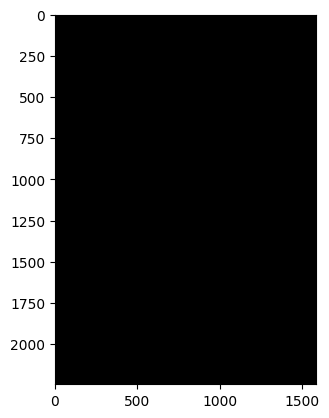

In [16]:
plt.imshow(mask,cmap = 'gray') #setting colormap to gray; imshow: displays your numpy array doesnt change anything

In [17]:
for i in result:
  coord = i[0]
  top_left = coord[0]
  bottom_right = coord[2]
  print(top_left,bottom_right)
  mask[top_left[1]:bottom_right[1]+1, top_left[0]:bottom_right[0]+1] = 1 #height first then weight

[576, 175] [845, 226]
[859, 173] [1284, 235]
[111, 663] [473, 795]
[110, 799] [627, 932]
[108, 974] [464, 1050]
[104, 1062] [496, 1138]
[108, 1152] [420, 1228]
[193, 1583] [271, 1627]
[296, 1578] [516, 1630]
[156, 1635] [865, 1704]
[155, 1701] [971, 1766]
[583, 1999] [1219, 2059]
[580, 2061] [1290, 2112]


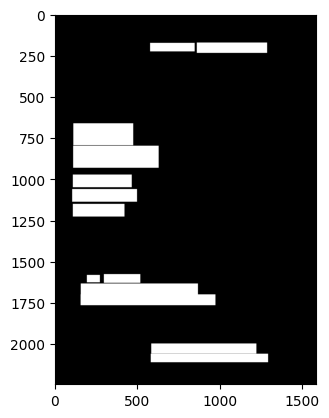

In [18]:
plt.imshow(mask,cmap = 'gray')

# Inpainting


>The mask we created has one channel where as while inpainting we are expected to have 3 channels which is why we will have to repeat the mask 3 times

> We convert the numpy array into PIL image by replacing the 1 with 255 (PIL always expects the INT scale)
>There are Two kinds of scales:
1. Floats -> 0 to 1.. intermediate values are decimal values
2. Integers -> 0 to 255.. intermediate values are integer values


In [19]:
mask = mask * 255
mask = mask.astype(np.uint8) #to change matrix into int

In [20]:
Image.fromarray(mask).convert('RGB').save("/content/sample_data/Test/design_010_mask001.png")

In [21]:
!git clone https://github.com/advimman/lama.git

Cloning into 'lama'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (443/443), done.
remote: Compressing objects: 100% (283/283), done.
remote: Total 443 (delta 171), reused 296 (delta 141), pack-reused 0
Receiving objects: 100% (443/443), 6.53 MiB | 19.79 MiB/s, done.
Resolving deltas: 100% (171/171), done.


In [22]:
%cd lama

/content/lama


In [23]:
!curl -LJO https://huggingface.co/smartywu/big-lama/resolve/main/big-lama.zip
!unzip big-lama.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1199  100  1199    0     0   3437      0 --:--:-- --:--:-- --:--:--  3445
100  363M  100  363M    0     0   233M      0  0:00:01  0:00:01 --:--:--  329M
Archive:  big-lama.zip
  inflating: big-lama/config.yaml    
  inflating: big-lama/models/best.ckpt  


In [24]:
!cp bin/predict.py predict.py

In [28]:
!pip install -r requirements.txt

  Using cached easydict-1.9.tar.gz (6.4 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.6/144.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.9/841.9 kB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.5/271.5 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 kB 22.5 MB/s eta 0:00:00
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6344 sha256=93cb6acdf2d9613374b7152089ab2faf15a6c3d3c52a37ebb0b576a202367167
  Stored in directory: /root/.cache/pip/wheels/fd/d2/35/4c11d19a722

In [26]:
!pip install torchtext==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.4 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.16.0
    Uninstalling torchtext-0.16.0:
      Successfully uninstalled torchtext-0.16.0


In [29]:
!python3 predict.py model.path=$(pwd)/big-lama indir=$(pwd)/../sample_data/Test outdir=$(pwd)/output

2024-01-07 10:05:14.580283: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-07 10:05:14.580334: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-07 10:05:14.581696: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-07 10:05:15.803731: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Detectron v2 is not installed
[2024-01-07 10:05:17,820][saicinpainting.utils][WARNING] - Setting signal 10 handler <function print_traceback_handler at 0x7eecb250ec20>
[2024-01-07 10:05:17,845][root][INFO] - Make training model default
[2024